In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [ ]:
a = pd.read_csv("/content/weight-height .csv")

In [ ]:
a

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
a.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
a.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
a.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [ ]:
x = a.values[:,1]
x


array([73.847017017515, 68.78190404589029, 74.11010539178491, ...,
       63.8679922137577, 69.03424313073461, 61.944245879517204],
      dtype=object)

In [ ]:
y = a.values[:,2]
y

array([241.893563180437, 162.3104725213, 212.7408555565, ...,
       128.475318784122, 163.852461346571, 113.64910267531201],
      dtype=object)

In [ ]:
mean_x = np.mean(x)
print(mean_x)
mean_y = np.mean(y)
print(mean_y)

66.36755975482106
161.44035683283076


In [ ]:
n = len(x)
numer = 0
denom = 0
for i in range(n):
  numer += (x[i]-mean_x)*(y[i]-mean_y)
  denom += (x[i]-mean_x)**2
b1 = numer / denom
b0 = mean_y - (b1*mean_x)
print(b1)
print(b0)

7.717287640785376
-350.7371918121347


In [ ]:
print("the linear model is ",b1,b0)

the linear model is  7.717287640785376 -350.7371918121347


In [ ]:
max_x= np.max(x) + 10
min_x= np.min(x) - 10
print(max_x)
print(min_x)

88.99874234638959
44.2631333250971


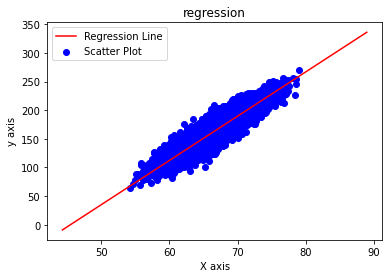

In [ ]:
X = np.linspace(max_x,min_x,1000)
Y = b1*X + b0
plt.plot(X,Y,color = 'red',label = "Regression Line")
plt.scatter(x,y,color = "blue",label = "Scatter Plot")
plt.xlabel("X axis")
plt.ylabel("y axis")
plt.title("regression")
plt.legend()
plt.show()

In [ ]:
x[2]

74.11010539178491

In [ ]:
y_pred = b0 + b1*x[2]
y_pred

221.1918085851886

In [ ]:
sa = 0
sb = 0
for i in range(n):
  y_pred = b0 + b1*x[i]
  sa += (y[i]-mean_y)**2
  sb += (y[i]-y_pred)**2
r2 = 1 - (sb/sa)
print("R2 Score")
print(r2)

R2 Score
0.8551742120609955


using the sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = a.values[:,1].reshape(-1,1)
Y = a.values[:,2].reshape(-1,1)


In [ ]:
reg =LinearRegression()
reg.fit(X,Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = reg.predict(X)
prediction

array([[219.16147993],
       [180.07254619],
       [221.19180859],
       ...,
       [142.15047514],
       [182.01991949],
       [127.30437133]])

In [ ]:

r2score = reg.score(X,Y)
print("R2 Score",r2score)

R2 Score 0.8551742120609956


In [ ]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

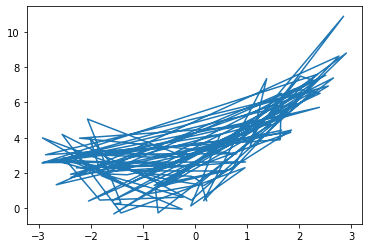

In [ ]:
plt.plot(X,y)

In [ ]:
plt.show()

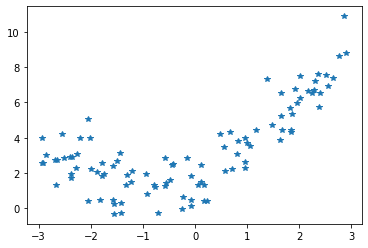

In [ ]:
plt.plot(X,y,'*')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias=False
                                   )

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0];X_poly[0]

array([0.22296447, 0.04971315])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.8286728]), array([[1.00554774, 0.53428605]]))

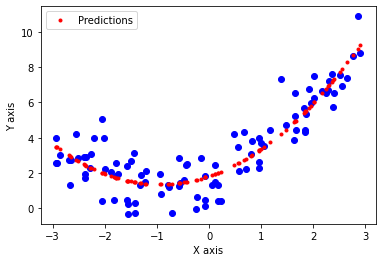

In [ ]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin_reg.predict(poly_features.transform(X)),'.',color = "red",label = "Predictions")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston = pd.DataFrame(boston_dataset.data)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
boston.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
boston.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
MEDV    0
dtype: int64

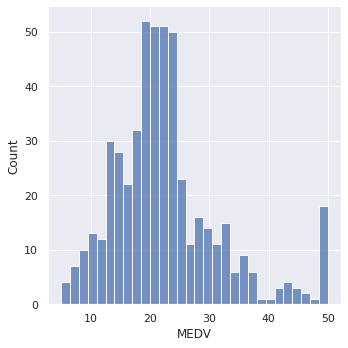

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.displot(boston['MEDV'],bins=30)
plt.show()

In [ ]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


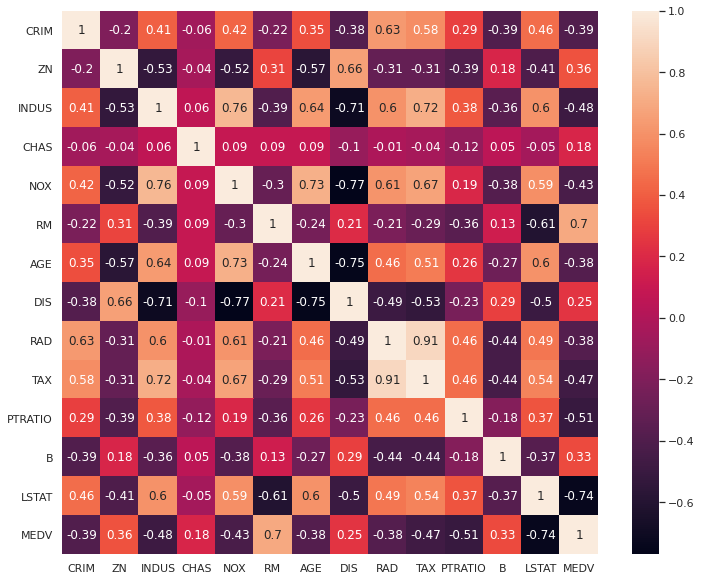

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns= ['LSTAT','RM'])
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [ ]:
y = boston['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
a,b = np.arange(10).reshape(5,2),range(5)
print(a)
print(b)
train_test_split(a,b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


[array([[4, 5],
        [8, 9],
        [2, 3]]), array([[0, 1],
        [6, 7]]), [2, 4, 1], [0, 3]]

In [ ]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [ ]:
Xtr,Xts,Ytr,Yts = train_test_split(X,y,test_size=0.2,random_state = 5)
print(Xtr)
print(Xts)
print(Xtr.shape)

     LSTAT     RM
33   18.35  5.701
283   3.16  7.923
418  20.62  5.957
502   9.08  6.120
402  20.31  6.404
..     ...    ...
486  14.98  6.114
189   5.39  7.185
495  17.60  5.670
206  10.97  6.326
355   5.57  5.936

[404 rows x 2 columns]
     LSTAT     RM
226   3.13  8.040
292   4.70  6.630
90    8.81  6.417
373  34.77  4.906
273   6.58  7.691
..     ...    ...
349   5.89  6.939
212  16.03  5.807
156  16.14  5.272
480  10.74  6.242
248   9.52  6.433

[102 rows x 2 columns]
(404, 2)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_predict = lin_reg.predict(Xtr)
rmse = (np.sqrt(mean_squared_error(Ytr,y_train_predict)))
r2 = r2_score(Ytr,y_train_predict)
print(rmse)
print(r2)

15.809831882931965
-1.9097304389511294


(506,)